## 서울시 전체 인구 추이

데이터: 서울시 열린 데이터 광장

https://data.seoul.go.kr/dataList/416/S/2/datasetView.do

In [1]:
import pandas as pd
data = pd.read_csv('./data/서울시_전체인구수추이.csv')
data

,구분별(1),구분별(2),구분별(3),2020,2021,2022,2023,2024
0,가구 (가구),소계,소계,4126524.00,4191171.00,4252134.00,4298420.00,4319073.00
1,인구 (명),합계,소계,9586195.00,9472127.00,9417469.00,9384512.00,9335444.00
2,인구 (명),합계,남자,4647733.00,4584251.00,4547051.00,4523958.00,4491757.00
3,인구 (명),합계,여자,4938462.00,4887876.00,4870418.00,4860554.00,4843687.00
4,인구 (명),한국인,한국인,9219741.00,9125047.00,9056522.00,9018373.00,8968153.00
5,인구 (명),한국인,남자,4474343.00,4421687.00,4381802.00,4357962.00,4326627.00
6,인구 (명),한국인,여자,4745398.00,4703360.00,4674720.00,4660411.00,4641526.00
7,인구 (명),외국인,외국인,366454.00,347080.00,360947.00,366139.00,367291.00
8,인구 (명),외국인,남자,173390.00,162564.00,165249.00,165996.00,165130.00
9,인구 (명),외국인,여자,193064.00,184516.00,195698.00,200143.00,202161.00


In [2]:
# 서울시 총 인구 수 꺾은 선 그래프로 추이 그리기
# 탭을 이용하여 한국인과 외국인의 인구 수 로 나눠서 보여주기(총, 한국인, 외국인)
data1 = data.iloc[[1,4,7]]
data1

,구분별(1),구분별(2),구분별(3),2020,2021,2022,2023,2024
1,인구 (명),합계,소계,9586195.0,9472127.0,9417469.0,9384512.0,9335444.0
4,인구 (명),한국인,한국인,9219741.0,9125047.0,9056522.0,9018373.0,8968153.0
7,인구 (명),외국인,외국인,366454.0,347080.0,360947.0,366139.0,367291.0


In [3]:
data1.columns

Index(['구분별(1)', '구분별(2)', '구분별(3)', '2020', '2021', '2022', '2023', '2024'], dtype='object')

In [4]:
import plotly.express as px
# ----------------------------------------------------
# 1. 서울시 총 인구 수 꺾은선 그래프 (구분별(2) == 합계)
# ----------------------------------------------------
df_total = data1[data1["구분별(2)"] == "합계"].melt(
    id_vars=["구분별(1)", "구분별(2)", "구분별(3)"], 
    var_name="년도", 
    value_name="인구수"
)

fig_line = px.line(
    df_total, 
    x="년도", 
    y="인구수", 
    title="서울시 총 인구 수 추이",
    markers=True
)
fig_line.show()

In [5]:
import pandas as pd
import plotly.express as px

# 1️⃣ 한국인/외국인 데이터만 선택
df_people = data1[data1["구분별(2)"].isin(["한국인"])]

# 2️⃣ long form으로 변환 (Plotly용)
years = ['2020','2021','2022','2023','2024']  # 컬럼명이 문자열일 경우
df_long = df_people.melt(
    id_vars=["구분별(3)"], 
    value_vars=years, 
    var_name="년도", 
    value_name="인구수"
)

# 3️⃣ 꺾은선 그래프 그리기
fig_line_total = px.line(
    df_long, 
    x="년도", 
    y="인구수", 
      # 한국인/외국인 구분
    markers=True,
    title="서울시 한국인 합계 인구 추이"
)
fig_line_total.show()


In [6]:
import pandas as pd
import plotly.express as px

# 1️⃣ 한국인/외국인 데이터만 선택
df_people = data1[data1["구분별(2)"].isin(["외국인"])]

# 2️⃣ long form으로 변환 (Plotly용)
years = ['2020','2021','2022','2023','2024']  # 컬럼명이 문자열일 경우
df_long = df_people.melt(
    id_vars=["구분별(3)"], 
    value_vars=years, 
    var_name="년도", 
    value_name="인구수"
)

# 3️⃣ 꺾은선 그래프 그리기
fig_line_total = px.line(
    df_long, 
    x="년도", 
    y="인구수", 
      # 한국인/외국인 구분
    markers=True,
    title="서울시 외국인 합계 인구 추이"
)
fig_line_total.show()

In [5]:
# 10년 이상의 서울시 인구 수 데이터를 통해서 회귀분석 진행
import pandas as pd

df = pd.read_csv("./data/서울시인구밀도.csv", on_bad_lines="skip", engine="python")

df.head()

,동별,항목,단위,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,2022 년,2023 년,2024 년,Unnamed: 18
0,합계,인구,명,10575447.00,10528774.00,10442426.00,10388055.00,10369593.00,10297138.00,10204057.00,10124579.00,10049607.00,10010983.00,9911088.00,9.736027e+06,9.667669e+06,9.638799e+06,9.597372e+06,NaN
1,합계,면적,㎢,605.25,605.21,605.18,605.20,605.21,605.25,605.20,605.24,605.24,605.24,605.23,6.052440e+02,6.052081e+02,6.052040e+02,6.052141e+02,NaN
2,합계,인구밀도,명/㎢,17473.00,17397.00,17255.00,17165.00,17134.00,17013.00,16861.00,16728.00,16604.00,16541.00,16376.00,1.608612e+04,1.597400e+04,1.592700e+04,1.585781e+04,NaN
3,종로구,인구,명,179362.00,177419.00,173148.00,167867.00,165344.00,163822.00,161922.00,164257.00,163026.00,161869.00,158996.00,1.537890e+05,1.522110e+05,1.504530e+05,1.496080e+05,NaN
4,종로구,면적,㎢,23.91,23.91,23.91,23.91,23.91,23.91,23.91,23.91,23.91,23.91,23.91,2.391294e+01,2.391316e+01,2.391322e+01,2.391323e+01,NaN


In [6]:
df.columns

Index(['동별', '항목', '단위', '2010 년', '2011 년', '2012 년', '2013 년', '2014 년',
       '2015 년', '2016 년', '2017 년', '2018 년', '2019 년', '2020 년', '2021 년',
       '2022 년', '2023 년', '2024 년', 'Unnamed: 18'],
      dtype='object')

In [7]:
row = df.iloc[0].drop(['동별','항목','단위','Unnamed: 18'])
data = pd.DataFrame(row)
data

,0
2010 년,10575447.0
2011 년,10528774.0
2012 년,10442426.0
2013 년,10388055.0
2014 년,10369593.0
2015 년,10297138.0
2016 년,10204057.0
2017 년,10124579.0
2018 년,10049607.0
2019 년,10010983.0


In [8]:
data = row.reset_index()
data.columns = ['연도', '인구수']
data

,연도,인구수
0,2010 년,10575447.0
1,2011 년,10528774.0
2,2012 년,10442426.0
3,2013 년,10388055.0
4,2014 년,10369593.0
5,2015 년,10297138.0
6,2016 년,10204057.0
7,2017 년,10124579.0
8,2018 년,10049607.0
9,2019 년,10010983.0


In [9]:
data['연도'] = data['연도'].str.replace('년','',regex=False).astype(int)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도      15 non-null     int64 
 1   인구수     15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


In [11]:
data['인구수'] = data['인구수'].astype(float)

c:\Users\김다은\Desktop\data_anal_port\streamlit_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2025 9509330
2026 9435149
2027 9360969
2028 9286788
2029 9212607
2030 9138427


c:\Users\김다은\Desktop\data_anal_port\streamlit_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\김다은\Desktop\data_anal_port\streamlit_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\김다은\Desktop\data_anal_port\streamlit_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\김다은\Desktop\data_anal_port\streamlit_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\김다은\Desktop\data_anal_port\streamlit_env\lib\site-packages\IPython\core\pylabtools.py:

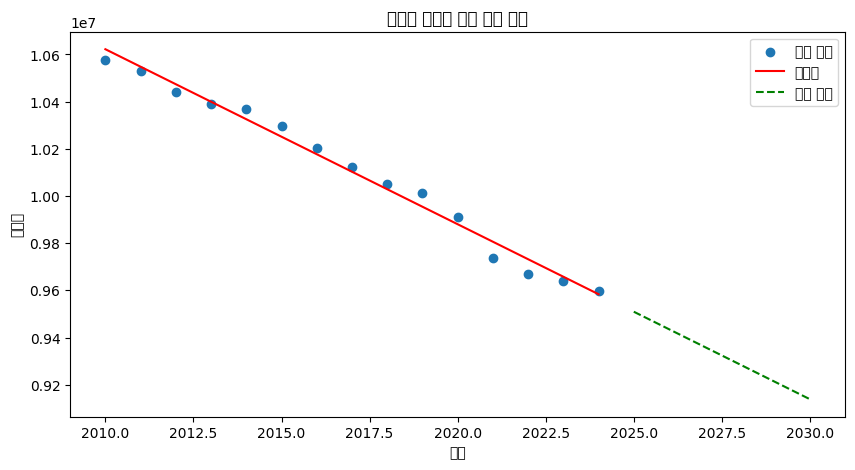

In [12]:
# 회귀분석
from sklearn.linear_model import LinearRegression
import numpy as np

X = data[['연도']] # 2차원 배열이 필요
y = data['인구수']

# 모델학습
model = LinearRegression()
model.fit(X,y)

future_years = np.array(range(2025, 2031)).reshape(-1,1)
predictions = model.predict(future_years)

for year, pop in zip(range(2025, 2031), predictions):
    print(year, int(pop))

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(data['연도'], data['인구수'], label='실제 인구')
plt.plot(data['연도'], model.predict(X), color='red', label='회귀선')
plt.plot(future_years, predictions, color='green', linestyle='--', label='예측 인구')

plt.xlabel('연도')
plt.ylabel('인구수')
plt.title('서울시 총인구 선형 회귀 예측')
plt.legend()
plt.show()

In [14]:
# 서울시 초등학생 학령인구 분석/예측
import pandas as pd
df = pd.read_csv('./data/초등학생_학령인구수.csv')
df

,자치구별(1),자치구별(2),2022,2022.1,2022.2,2023,2023.1,2023.2,2024,2024.1,...,2039.2,2040,2040.1,2040.2,2041,2041.1,2041.2,2042,2042.1,2042.2
0,자치구별(1),자치구별(2),합계,합계,합계,합계,합계,합계,합계,합계,...,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계
1,자치구별(1),자치구별(2),소계,남자,여자,소계,남자,여자,소계,남자,...,여자,소계,남자,여자,소계,남자,여자,소계,남자,여자
2,합계,소계,399046,204604,194442,382984,196186,186798,364858,186723,...,112110,237560,121478,116082,244524,125047,119477,250347,128033,122314
3,합계,종로구,4867,2440,2427,4560,2266,2294,4296,2122,...,1331,2815,1433,1382,2901,1475,1426,2970,1510,1460
4,합계,중구,3764,1919,1845,3680,1857,1823,3441,1753,...,1097,2330,1196,1134,2398,1231,1167,2448,1258,1190
5,합계,용산구,8380,4254,4126,8113,4098,4015,7472,3788,...,2221,4565,2264,2301,4705,2333,2372,4822,2389,2433
6,합계,성동구,10832,5455,5377,10604,5311,5293,10081,5119,...,3119,6589,3364,3225,6770,3455,3315,6919,3532,3387
7,합계,광진구,12406,6343,6063,11736,6041,5695,10965,5669,...,3158,6593,3318,3275,6791,3419,3372,6961,3506,3455
8,합계,동대문구,12615,6499,6116,12378,6376,6002,12114,6221,...,4279,8931,4495,4436,9198,4631,4567,9421,4744,4677
9,합계,중랑구,13963,7216,6747,13406,6927,6479,12486,6420,...,3939,8261,4191,4070,8482,4302,4180,8667,4397,4270


In [15]:
data1 = df[['2022','2023','2024','2025','2026','2027','2028','2029','2030']].iloc[2]

In [16]:
data = pd.DataFrame(data1).reset_index()

In [24]:
data

,연도,인구수
0,2022,399046
1,2023,382984
2,2024,364858
3,2025,342473
4,2026,320986
5,2027,296010
6,2028,270327
7,2029,248531
8,2030,230248


In [18]:
data.columns = ['연도', '인구수']

c:\Users\김다은\Desktop\data_anal_port\streamlit_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\김다은\Desktop\data_anal_port\streamlit_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\김다은\Desktop\data_anal_port\streamlit_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\김다은\Desktop\data_anal_port\streamlit_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\김다은\Desktop\data_anal_port\streamlit_env\lib\site-packages\IPython\core\pylabtools.py

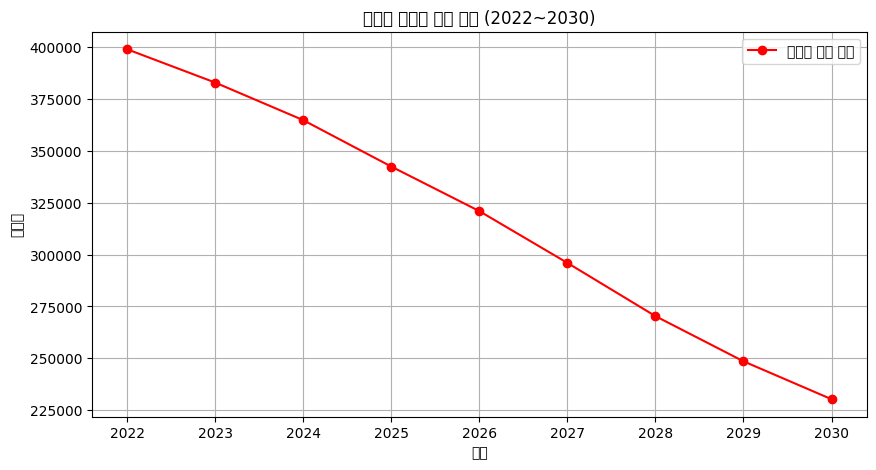

In [28]:



# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(data['연도'], data['인구수'], marker='o', linestyle='-', color='red', label='인구수 감소 추세')
plt.xlabel('연도')
plt.ylabel('인구수')
plt.title('연도별 인구수 감소 추세 (2022~2030)')
plt.grid(True)
plt.legend()
plt.show()

In [20]:
data['연도'] = data['연도'].astype(int)

In [34]:
# 초등학생 입학생 수
df2 = pd.read_csv("./data/초등학생학교현황정제.csv",encoding='cp949')
df2

,2018,2018.1,2018.2,2018.3,2019,2019.1,2019.2,2019.3,2020,2020.1,...,2023,2023.1,2023.2,2023.3,2023.4,2024,2024.1,2024.2,2024.3,2024.4
0,학교수 (개),학생수 (명),교원수 (명),입학자수 (명),학교수 (개),학생수 (명),교원수 (명),입학자수 (명),학교수 (개),학생수 (명),...,학교수 (개),학생수 (명),교원수 (명),직원수 (명),입학자수 (명),학교수 (개),학생수 (명),교원수 (명),직원수 (명),입학자수 (명)
1,603,424800,28992,70686,607,422293,28727,72171,607,409536,...,608,380439,28080,3025,59226,609,363157,27546,3008,52071


In [38]:
df2.to_numpy()

array([['학교수 (개)', '학생수 (명)', '교원수 (명)', '입학자수 (명)', '학교수 (개)',
        '학생수 (명)', '교원수 (명)', '입학자수 (명)', '학교수 (개)', '학생수 (명)',
        '교원수 (명)', '입학자수 (명)', '학교수 (개)', '학생수 (명)', '입학자수 (명)',
        '학교수 (개)', '학생수 (명)', '교원수 (명)', '입학자수 (명)', '학교수 (개)',
        '학생수 (명)', '교원수 (명)', '직원수 (명)', '입학자수 (명)', '학교수 (개)',
        '학생수 (명)', '교원수 (명)', '직원수 (명)', '입학자수 (명)'],
       ['603', '424800', '28992', '70686', '607', '422293', '28727',
        '72171', '607', '409536', '28608', '64898', '607', '399435',
        '63690', '609', '393565', '28335', '64013', '608', '380439',
        '28080', '3025', '59226', '609', '363157', '27546', '3008',
        '52071']], dtype=object)

In [42]:

import pandas as pd
import numpy as np

# 제공된 리스트 데이터
data_list = ['603', '424800', '28992', '70686', '607', '422293', '28727', 
             '72171', '607', '409536', '28608', '64898', '607', '399435', 
             '28219','63690', '609', '393565', '28335', '64013', '608', '380439', 
             '28080', '59226', '609', '363157', '27546','52071']

# 데이터를 NumPy 배열로 변환하고, 4개씩 묶기 위해 28개 항목만 사용
data_array = np.array(data_list[:28]).reshape(-1, 4)

# 열 이름 설정
column_names = ['학교수 (개)', '학생수 (명)', '교원수 (명)', '입학자수 (명)']

# 데이터프레임 생성
df = pd.DataFrame(data_array, columns=column_names)

# '년도' 칼럼 추가 (2018년부터 2024년까지)
df.insert(0, '년도', range(2018, 2025))

print(df)

     년도 학교수 (개) 학생수 (명) 교원수 (명) 입학자수 (명)
0  2018     603  424800   28992    70686
1  2019     607  422293   28727    72171
2  2020     607  409536   28608    64898
3  2021     607  399435   28219    63690
4  2022     609  393565   28335    64013
5  2023     608  380439   28080    59226
6  2024     609  363157   27546    52071


In [46]:
# 데이터 타입 변환 (문자열을 숫자로)
import plotly.express as px
fig1 = px.line(df, x='년도', y='학생수 (명)', title='연도별 학생 수 변화 추이', markers=True)
fig1.show()

# 2. 교원 수 변화 추세 그래프
fig2 = px.line(df, x='년도', y='교원수 (명)', title='연도별 교원 수 변화 추이', markers=True)
fig2.show()

# 3. 입학자 수 변화 추세 그래프
fig3 = px.line(df, x='년도', y='입학자수 (명)', title='연도별 입학자 수 변화 추이', markers=True)
fig3.show()

print("\n분석 그래프가 생성되어 새 창에 표시됩니다.")


분석 그래프가 생성되어 새 창에 표시됩니다.
